In [1]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv("Housing.csv")

In [4]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


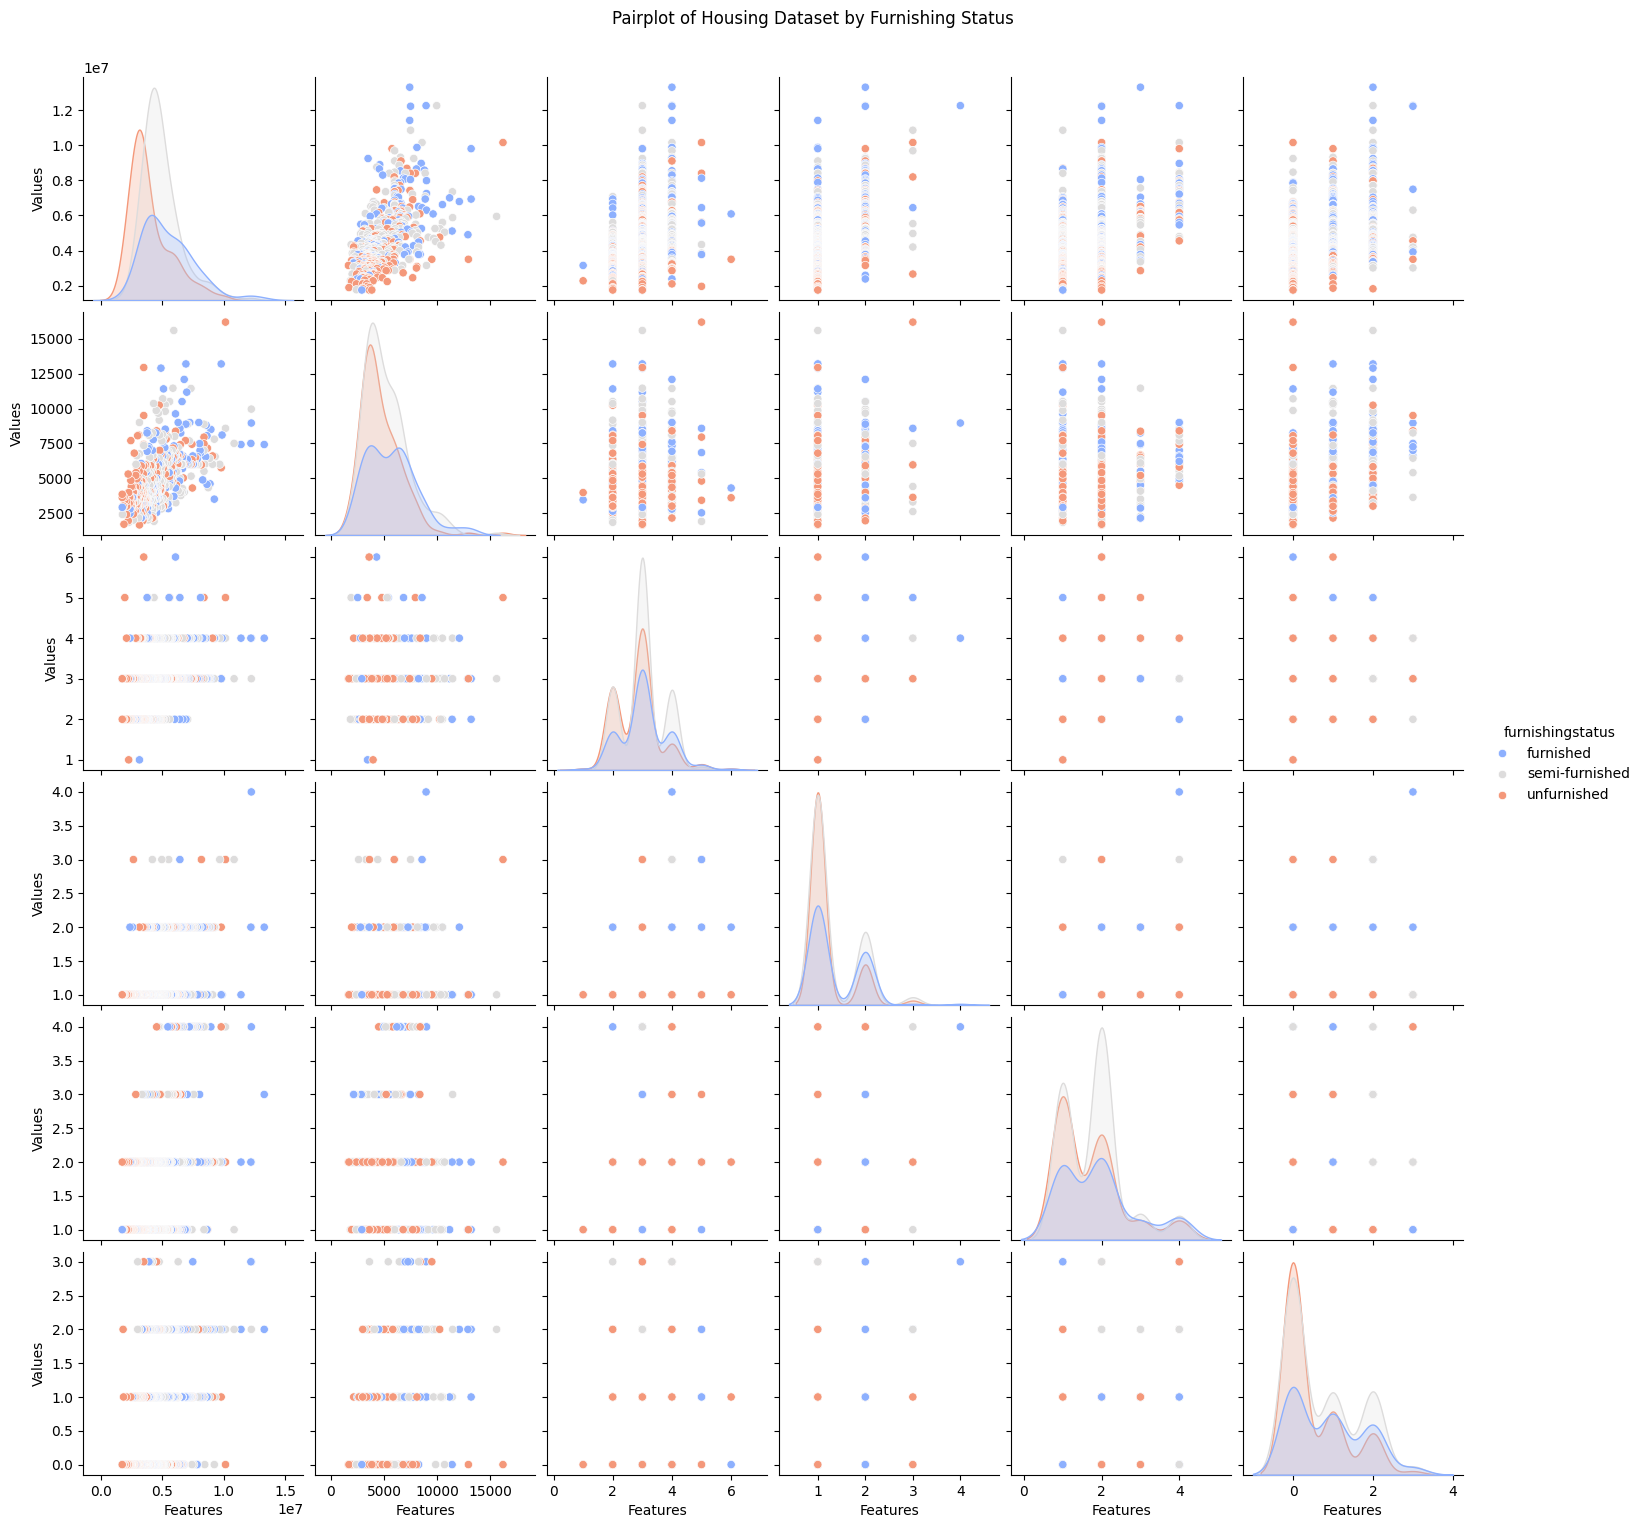

In [8]:
# Pairplot to visualize relationships between features
pairplot = sns.pairplot(data, hue='furnishingstatus', palette="coolwarm")
pairplot.fig.suptitle("Pairplot of Housing Dataset by Furnishing Status", y=1.02)  # Adjust y for title position
pairplot.set(xlabel='Features', ylabel='Values')
plt.show()

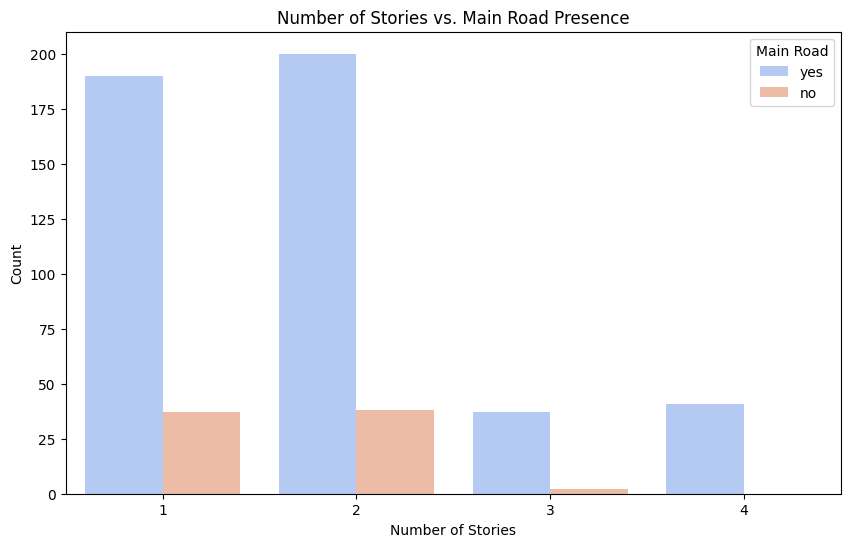

In [9]:
# Create a count plot of stories vs mainroad
plt.figure(figsize=(10, 6))
sns.countplot(x='stories', hue='mainroad', data=data, palette='coolwarm')

plt.title('Number of Stories vs. Main Road Presence')
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.legend(title='Main Road', loc='upper right')
plt.show()

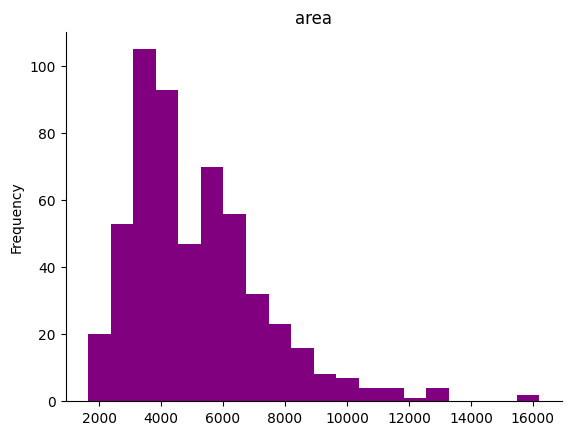

In [10]:
from matplotlib import pyplot as plt
data['area'].plot(kind='hist', bins=20, title='area', color='purple')
plt.gca().spines[['top', 'right',]].set_visible(False)

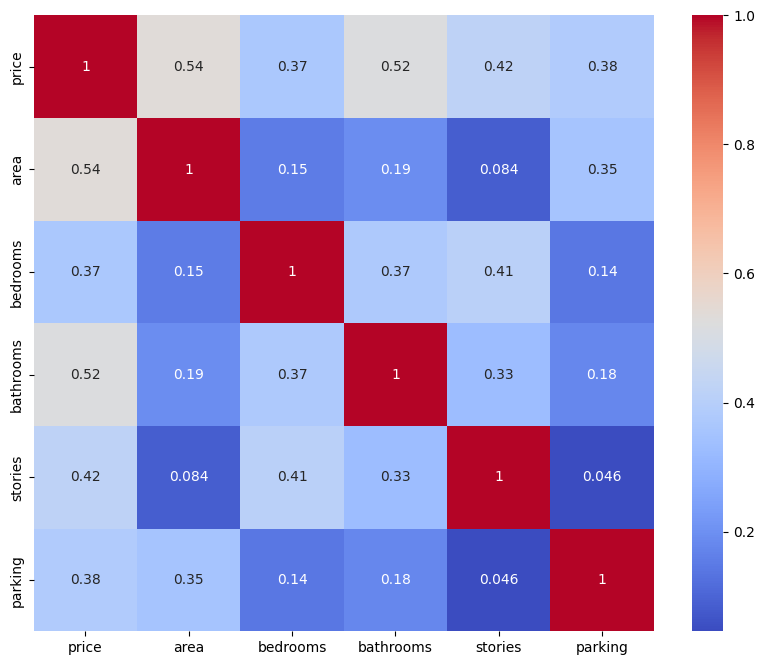

In [11]:
# Filter the dataset to include only numeric columns for correlation
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Heatmap to visualize correlations between numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

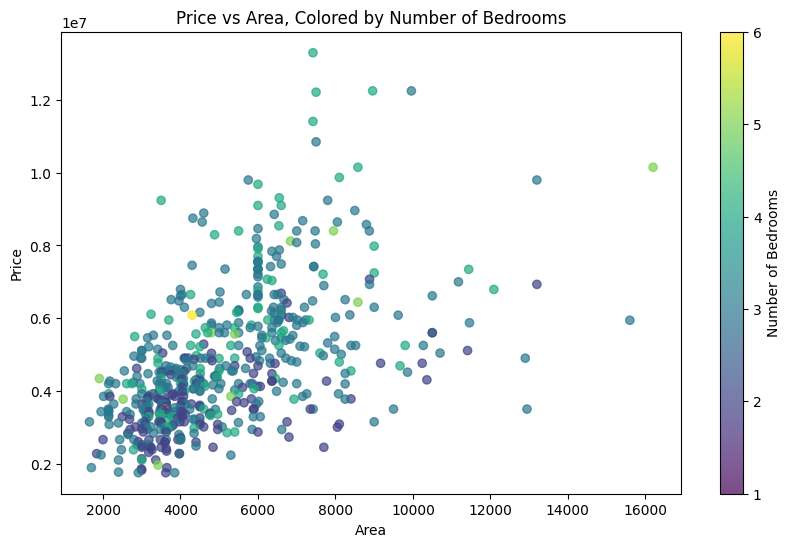

In [12]:
# Create a scatter plot with color-coded points based on the number of bedrooms
plt.figure(figsize=(10, 6))
plt.scatter(data['area'], data['price'], c=data['bedrooms'], cmap='viridis', alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area, Colored by Number of Bedrooms')
_ = plt.colorbar(label='Number of Bedrooms')

In [13]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 1021546.0353211008
Mean Squared Error: 1961585044320.3433
Root Mean Squared Error: 1400565.9728553821
R^2 Score: 0.611918531405699


In [16]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - Mean Absolute Error: {mae_linear}')
print(f'Linear Regression - Mean Squared Error: {mse_linear}')
print(f'Linear Regression - Root Mean Squared Errorr: {rmse_linear}')
print(f'Linear Regression - R^2 Score: {r2_linear}')


Linear Regression - Mean Absolute Error: 970043.4039201636
Linear Regression - Mean Squared Error: 1754318687330.6638
Linear Regression - Root Mean Squared Errorr: 1324506.9600914386
Linear Regression - R^2 Score: 0.6529242642153184
